In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [2]:
data = pd.read_csv('/content/Housing.csv')

In [3]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


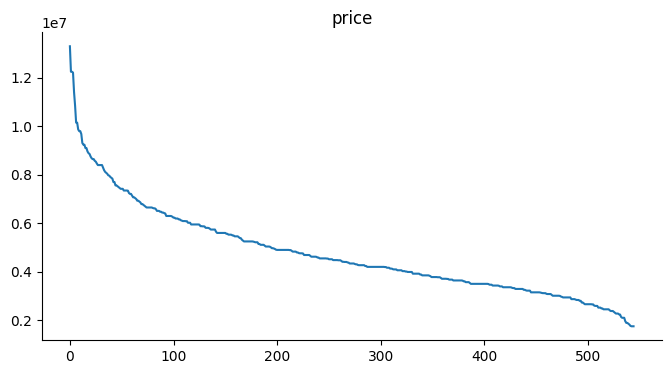

In [88]:
# @title price

from matplotlib import pyplot as plt
data['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
data.drop('mainroad',axis=1,inplace=True)

In [10]:
data

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,0,no,furnished


In [12]:
data.drop('guestroom',axis=1,inplace=True)

In [14]:
data.drop('basement',axis=1,inplace=True)

In [15]:
data.drop('hotwaterheating',axis=1,inplace=True)

In [16]:
data.drop('airconditioning',axis=1,inplace=True)

In [17]:
data.drop('prefarea',axis=1,inplace=True)

In [18]:
data.drop('furnishingstatus',axis=1,inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   stories    545 non-null    int64
 5   parking    545 non-null    int64
dtypes: int64(6)
memory usage: 25.7 KB


In [20]:
data

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [32]:
x=data.iloc[: ,[1,2,3,4,5]].values

In [33]:
x

array([[7420,    4,    2,    3,    2],
       [8960,    4,    4,    4,    3],
       [9960,    3,    2,    2,    2],
       ...,
       [3620,    2,    1,    1,    0],
       [2910,    3,    1,    1,    0],
       [3850,    3,    1,    2,    0]])

In [34]:
y=data.iloc[: ,0].values

In [35]:
y

array([13300000, 12250000, 12250000, 12215000, 11410000, 10850000,
       10150000, 10150000,  9870000,  9800000,  9800000,  9681000,
        9310000,  9240000,  9240000,  9100000,  9100000,  8960000,
        8890000,  8855000,  8750000,  8680000,  8645000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8400000,  8400000,
        8400000,  8400000,  8295000,  8190000,  8120000,  8080940,
        8043000,  7980000,  7962500,  7910000,  7875000,  7840000,
        7700000,  7700000,  7560000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7420000,  7420000,  7350000,  7350000,
        7350000,  7350000,  7343000,  7245000,  7210000,  7210000,
        7140000,  7070000,  7070000,  7035000,  7000000,  6930000,
        6930000,  6895000,  6860000,  6790000,  6790000,  6755000,
        6720000,  6685000,  6650000,  6650000,  6650000,  6650000,
        6650000,  6650000,  6629000,  6615000,  6615000,  6580000,
        6510000,  6510000,  6510000,  6475000,  6475000,  6440

In [57]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
regressor=LinearRegression()

In [60]:
regressor.fit(x_train , y_train)

LinearRegression()

In [61]:
y_pred=regressor.predict(x_test)

In [62]:
from sklearn.metrics import r2_score, mean_squared_error ,  mean_absolute_error

In [63]:
mse=mean_squared_error(y_test , ypred)
mean_absolute_error=mean_absolute_error(y_test , ypred)
r2_score=r2_score(y_test , ypred)

In [67]:
print ("mean_squared_error = " ,mse)

mean_squared_error =  1206140019182.6484


In [69]:
print ("mean_absolute_error =", mean_absolute_error)

mean_absolute_error = 814356.5091382215


In [70]:
print("r2_score = ",r2_score)

r2_score =  0.6453433328353939


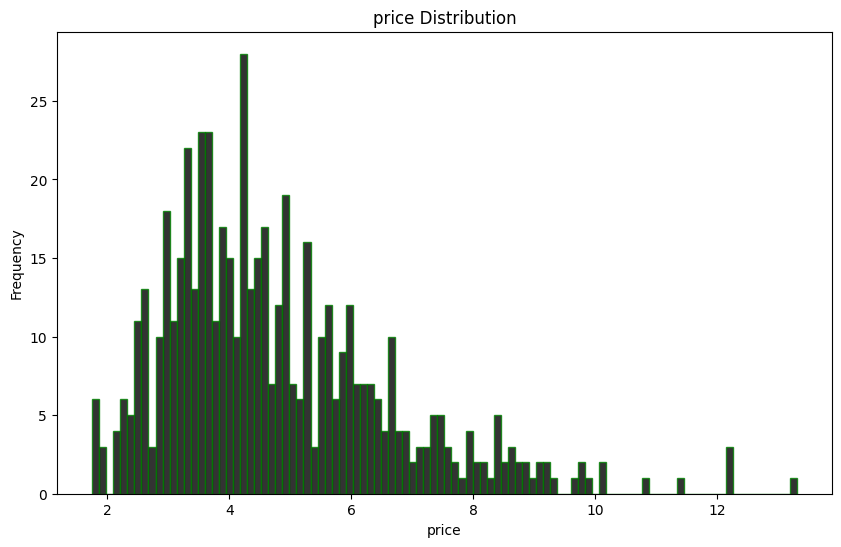

In [72]:
plt.figure(figsize=(10, 6))
plt.hist(data['price']/1000000, bins=100, color='black', alpha=0.8, edgecolor='green')
plt.title('price Distribution')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

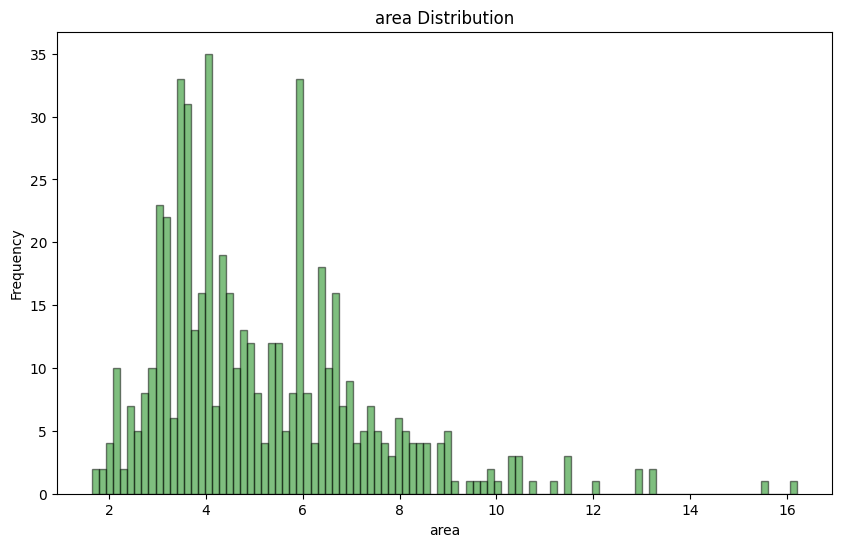

In [73]:
plt.figure(figsize=(10, 6))
plt.hist(data['area']/1000, bins=100, color='green', alpha=0.5, edgecolor='black')
plt.title('area Distribution')
plt.xlabel('area')
plt.ylabel('Frequency')
plt.show()

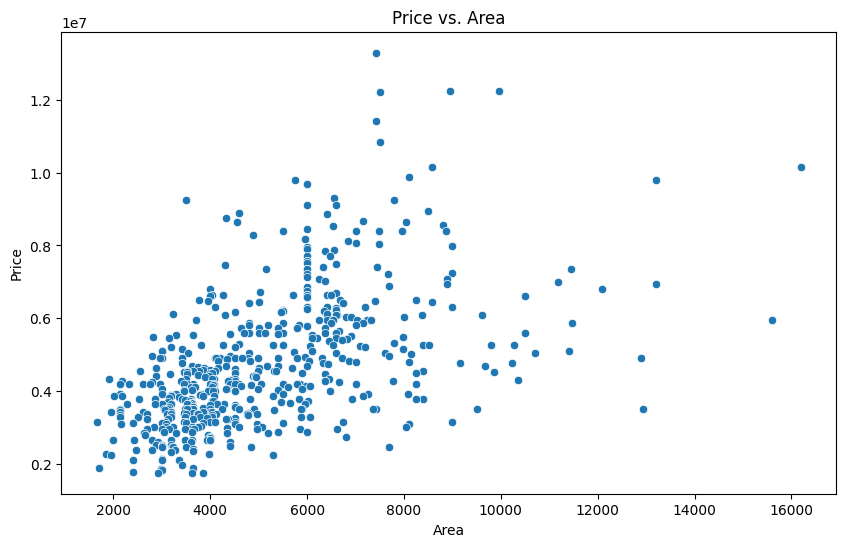

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='area', y='price')  # شيل palette
plt.title('Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')

plt.show()

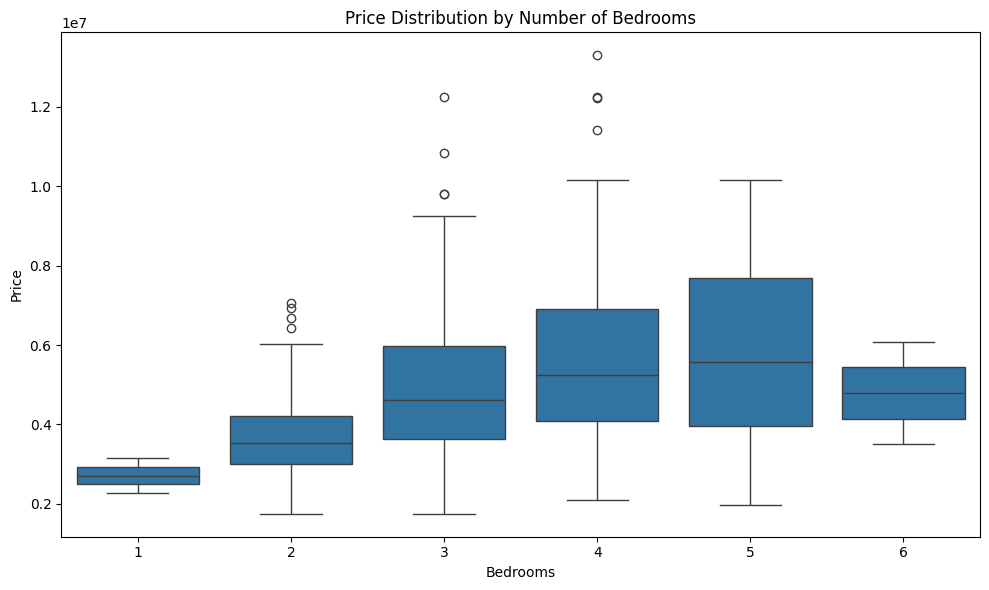

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(x='bedrooms', y='price', data=data)

plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `furnishingstatus` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

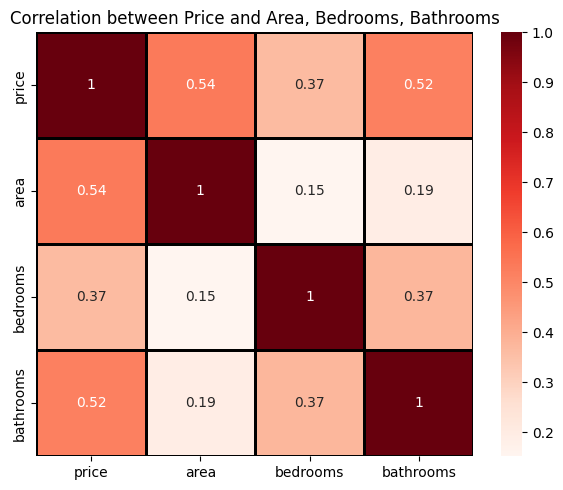

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

data_plotting = data[['price', 'area', 'bedrooms', 'bathrooms']].corr(method='pearson')

plt.figure(figsize=(6, 5))
sns.heatmap(data_plotting, cmap='Reds', linecolor='black', linewidths=1, annot=True)

plt.title('Correlation between Price and Area, Bedrooms, Bathrooms')
plt.tight_layout()
plt.show()

In [86]:
print(" pred house price = ",regressor.predict([[1000,5,3,1,1]]))

 pred house price =  [5357589.97777967]
